In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [78]:
data = pd.read_csv('../../data/03.All_validation_summary/Best_models_by_ST_and_LL_validation_summaries.csv')

import re
pat = re.compile(r'ent(?P<ent>[\d\.e-]+)_dist(?P<dist>[\d\.e-]+)_pow(?P<pow>[\d\.e-]+).hdf5')

ents, dists, pows = [], [], []
for fn in data['model'].values:
    m = pat.search(fn)
    if not m:
        continue
    ents.append(float(m.group('ent')))
    dists.append(float(m.group('dist')))
    pows.append(float(m.group('pow')))

data['ent'] = ents
data['dist'] = dists
data['pow'] = pows



## Gourp by order?

In [79]:
sum_ = data['ent'] + data['dist']
data['ent'] = data['ent']/sum_
data['dist'] = data['dist']/sum_
# Because the ent + dist chanegs for the relative weight of obs, and the weight obs is simply for matching the S&T distribution, we might 
# need to normalize it.

In [80]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
print('Order clustering silhouette score', silhouette_score(StandardScaler().fit_transform(data[['ent','dist','pow']]), data[['ORDER1_eBird']]))
print('Family clustering silhouette score', silhouette_score(StandardScaler().fit_transform(data[['ent','dist','pow']]), data[['FAMILY1_eBird']]))
print('Family clustering silhouette score (passerine only)', silhouette_score(StandardScaler().fit_transform(
    data[data['ORDER1_eBird']=='Passeriformes'][['ent','dist','pow']]), 
    data[data['ORDER1_eBird']=='Passeriformes'][['FAMILY1_eBird']]))

print('======== for each hyperparameter =======')
for hyperparam in ['ent', 'dist', 'pow']:
    print(f'Order clustering silhouette score (for {hyperparam})', silhouette_score(StandardScaler().fit_transform(data[[hyperparam]]), data[['ORDER1_eBird']]))
    print(f'Family clustering silhouette score (for {hyperparam})', silhouette_score(StandardScaler().fit_transform(data[[hyperparam]]), data[['FAMILY1_eBird']]))
    print(f'Family clustering silhouette score (for {hyperparam}) (passerine only)', silhouette_score(StandardScaler().fit_transform(
        data[data['ORDER1_eBird']=='Passeriformes'][[hyperparam]]), 
        data[data['ORDER1_eBird']=='Passeriformes'][['FAMILY1_eBird']]))


Order clustering silhouette score -0.8498970066018217
Family clustering silhouette score -0.7777050566267654
Family clustering silhouette score (passerine only) -0.7543458393732694
======== for each hyperparameter =======
Order clustering silhouette score (for ent) -0.8844163265828585
Family clustering silhouette score (for ent) -0.8073708912067247
Family clustering silhouette score (for ent) (passerine only) -0.8457287642283533
Order clustering silhouette score (for dist) -0.884416326582729
Family clustering silhouette score (for dist) -0.8073708912065747
Family clustering silhouette score (for dist) (passerine only) -0.8457270971348866
Order clustering silhouette score (for pow) -0.9148322113581971
Family clustering silhouette score (for pow) -0.728313771377101
Family clustering silhouette score (for pow) (passerine only) -0.6358357976005035


/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y 

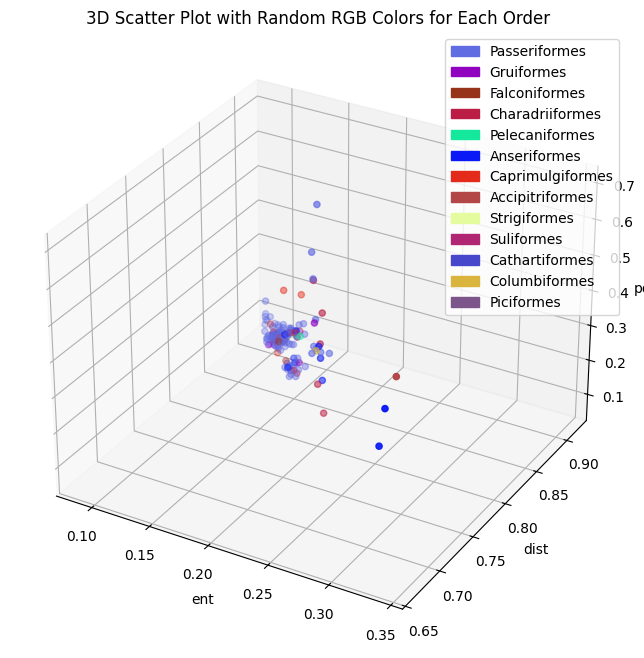

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting

# Example: create some jittered x and y data and use 'pow' for z
x = data['ent'] + np.random.normal(0, np.std(data['ent'])/10, size=data.shape[0])
y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0])
z = data['pow'] + np.random.normal(0, np.std(data['pow'])/10, size=data.shape[0])

# Get unique orders from the categorical column.
unique_orders = data['ORDER1_eBird'].unique()

# Create a mapping from each order to a random RGB color.
# Each color is a tuple of 3 numbers (red, green, blue) between 0 and 1.
order_random_map = {order: tuple(np.random.rand(3)) for order in unique_orders}

# Map the random colors back to each row in the DataFrame based on the order.
colors = data['ORDER1_eBird'].map(order_random_map)

# Create the 3D scatter plot.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colors, marker='o')

ax.set_xlabel('ent')
ax.set_ylabel('dist')
ax.set_zlabel('pow')
ax.set_title("3D Scatter Plot with Random RGB Colors for Each Order")

# Optionally, add a legend to display which color corresponds to each order.
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=order_random_map[order], label=order) 
                  for order in order_random_map]
ax.legend(handles=legend_handles, bbox_to_anchor=(1, 1))

plt.show()

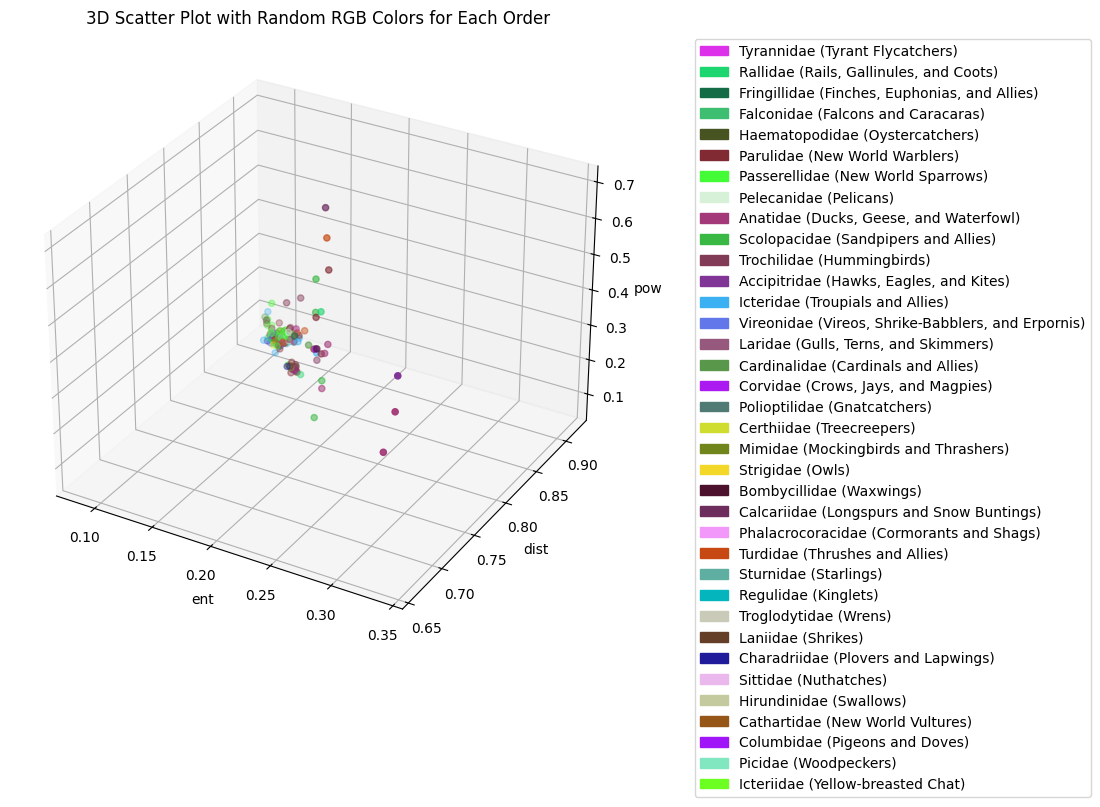

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting

# Example: create some jittered x and y data and use 'pow' for z
x = data['ent'] + np.random.normal(0, np.std(data['ent'])/10, size=data.shape[0])
y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0])
z = data['pow'] + np.random.normal(0, np.std(data['pow'])/10, size=data.shape[0])

# Get unique orders from the categorical column.
unique_orders = data['FAMILY1_eBird'].unique()

# Create a mapping from each order to a random RGB color.
# Each color is a tuple of 3 numbers (red, green, blue) between 0 and 1.
order_random_map = {order: tuple(np.random.rand(3)) for order in unique_orders}

# Map the random colors back to each row in the DataFrame based on the order.
colors = data['FAMILY1_eBird'].map(order_random_map)

# Create the 3D scatter plot.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colors, marker='o')

ax.set_xlabel('ent')
ax.set_ylabel('dist')
ax.set_zlabel('pow')
ax.set_title("3D Scatter Plot with Random RGB Colors for Each Order")

# Optionally, add a legend to display which color corresponds to each order.
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=order_random_map[order], label=order) 
                  for order in order_random_map]
ax.legend(handles=legend_handles, bbox_to_anchor=(1.1, 1))

plt.show()

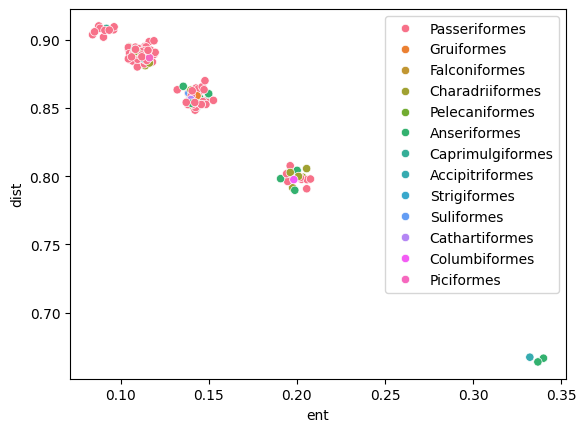

In [83]:
sns.scatterplot(
    x = data['ent'] + np.random.normal(0, np.std(data['ent'])/10, size=data.shape[0]),
    y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0]),
    hue = data['ORDER1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))


<Axes: >

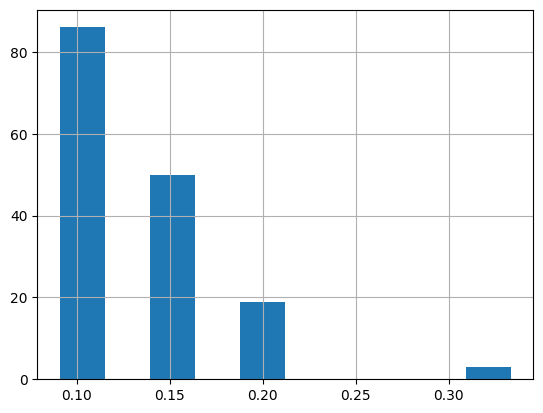

In [105]:
data['ent'].hist()

<Axes: >

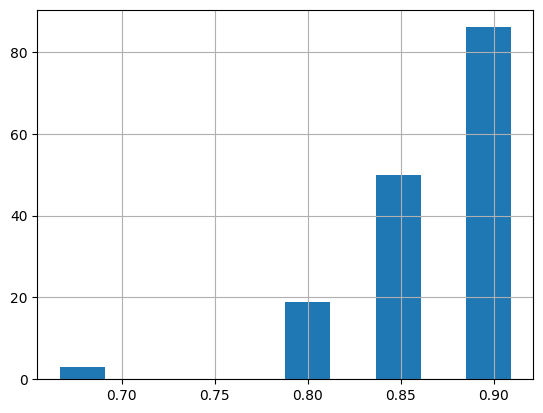

In [106]:
data['dist'].hist()

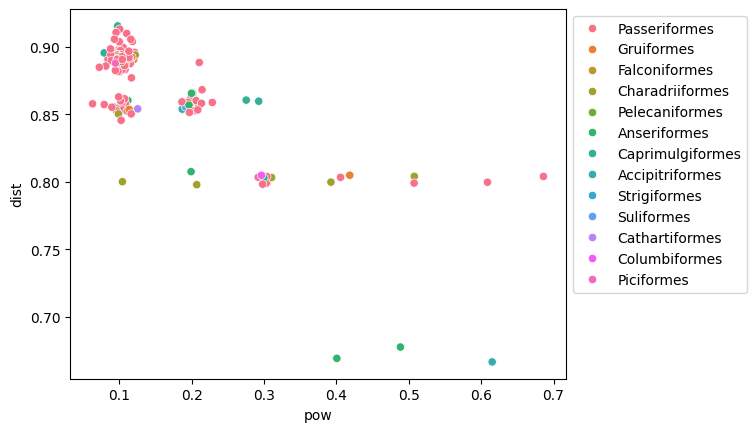

In [84]:
sns.scatterplot(
    x = data['pow'] + np.random.normal(0, np.std(data['pow'])/10, size=data.shape[0]),
    y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0]),
    hue = data['ORDER1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))


## PCA

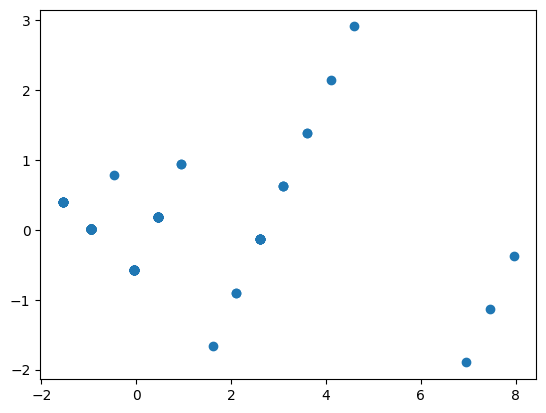

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2).fit(StandardScaler().fit_transform(data[['dist', 'pow', 'ent']]))
pca.explained_variance_ratio_
res = pca.transform(StandardScaler().fit_transform(data[['dist', 'pow', 'ent']]))
plt.scatter(res[:,0], res[:,1])


In [86]:
data['common_name'].unique()

array(['Acadian Flycatcher', 'American Coot', 'American Goldfinch',
       'American Kestrel', 'American Oystercatcher', 'American Redstart',
       'American Tree Sparrow', 'American White Pelican',
       'American Wigeon', 'American Woodcock', "Anna's Hummingbird",
       'Bald Eagle', 'Baltimore Oriole', 'Bay-breasted Warbler',
       "Bell's Vireo", 'Black Skimmer', 'Black-and-white Warbler',
       'Black-bellied Whistling-Duck', 'Black-chinned Hummingbird',
       'Black-headed Grosbeak', 'Black-throated Blue Warbler',
       'Black-throated Green Warbler', 'Blackburnian Warbler',
       'Blackpoll Warbler', 'Blue Grosbeak', 'Blue Jay',
       'Blue-gray Gnatcatcher', 'Blue-winged Teal', 'Blue-winged Warbler',
       'Broad-billed Hummingbird', 'Broad-winged Hawk', 'Brown Creeper',
       'Brown Pelican', 'Brown Thrasher', 'Brown-headed Cowbird',
       "Bullock's Oriole", 'Burrowing Owl', 'California Gull',
       'Canada Goose', 'Canada Warbler', 'Canvasback', 'Cape May Warble

In [87]:
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.91439689 0.08560311]
[[-0.59207071  0.54672163  0.59207071]
 [ 0.38659057  0.83731443 -0.38659057]]


Text(0, 0.5, 'PC2')

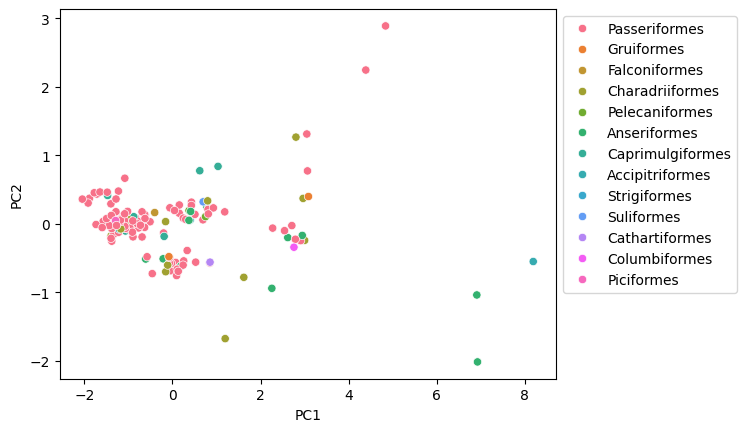

In [103]:
sns.scatterplot(
    x = res[:,0] + np.random.normal(0, np.std(res[:,0])/5, size=data.shape[0]),
    y = res[:,1] + np.random.normal(0, np.std(res[:,1])/5, size=data.shape[0]),
    hue = data['ORDER1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('PC1')
plt.ylabel('PC2')

In [89]:
data['PC1'] = res[:,0]
data['PC2'] = res[:,1]

In [90]:
data[data['PC2']>=3]

,Unnamed: 0,common_name,sp,method,model,mean_ll_improvement,weighted_mean_ll_improvement,mean_win_distance_fraction,weighted_mean_win_distance,mean_energy_improvement,weighted_energy_improvement,pit_d,end_traverse_cor,end_traverse_cor_log,synth_routes_prebreeding_migration_straightness,synth_routes_prebreeding_migration_n_stopovers,synth_routes_prebreeding_migration_speed,synth_routes_breeding_straightness,synth_routes_breeding_n_stopovers,synth_routes_breeding_speed,synth_routes_postbreeding_migration_straightness,synth_routes_postbreeding_migration_n_stopovers,synth_routes_postbreeding_migration_speed,synth_routes_nonbreeding_straightness,synth_routes_nonbreeding_n_stopovers,synth_routes_nonbreeding_speed,training_n_intervals,base_method,method_variation,nonbreeding_lon_c,nonbreeding_lat_c,nonbreeding_lat_max,nonbreeding_lat_min,nonbreeding_lon_max,nonbreeding_lon_min,nonbreeding_range_size,nonbreeding_abundance_variation,prebreeding_lon_c,prebreeding_lat_c,prebreeding_lat_max,prebreeding_lat_min,prebreeding_lon_max,prebreeding_lon_min,prebreeding_range_size,prebreeding_abundance_variation,breeding_lon_c,breeding_lat_c,breeding_lat_max,breeding_lat_min,breeding_lon_max,breeding_lon_min,breeding_range_size,breeding_abundance_variation,postbreeding_lon_c,postbreeding_lat_c,postbreeding_lat_max,postbreeding_lat_min,postbreeding_lon_max,postbreeding_lon_min,postbreeding_range_size,postbreeding_abundance_variation,ent,dist,pow,Species2_eBird,ORDER1_eBird,FAMILY1_eBird,Species1_BirdLife,Species3_BirdTree,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand.Wing_Index,Tail_Length,Mass,Migration,Min_Latitude,Max_Latitude,Centroid_Latitude,Centroid_Longitude,Range_Size,Trophic_Level_Carnivore,Trophic_Level_Herbivore,Trophic_Level_Omnivore,Trophic_Level_Scavenger,Trophic_Niche_Aquatic.predator,Trophic_Niche_Frugivore,Trophic_Niche_Granivore,Trophic_Niche_Herbivore.aquatic,Trophic_Niche_Herbivore.terrestrial,Trophic_Niche_Invertivore,Trophic_Niche_Nectarivore,Trophic_Niche_Omnivore,Trophic_Niche_Scavenger,Trophic_Niche_Vertivore,Primary_Lifestyle_Aerial,Primary_Lifestyle_Aquatic,Primary_Lifestyle_Generalist,Primary_Lifestyle_Insessorial,Primary_Lifestyle_Terrestrial,Realm_Indomalayan,Realm_Palearctic,Realm_Nearctic,Realm_Afrotropical,Realm_Oceanian,Realm_Neotropical,Realm_Australasian,Realm_Antarctic,redlistCategory,populationTrend,habitat_breadth,Diet_Inv,Diet_Vend,Diet_Vect,Diet_Vfish,Diet_Vunk,Diet_Scav,Diet_Fruit,Diet_Nect,Diet_Seed,Diet_PlantO,Diet_5CatFruiNect,Diet_5CatInvertebrate,Diet_5CatOmnivore,Diet_5CatPlantSeed,Diet_5CatVertFishScav,ForStrat_watbelowsurf,ForStrat_wataroundsurf,ForStrat_ground,ForStrat_understory,ForStrat_midhigh,ForStrat_canopy,ForStrat_aerial,Diet_Breadth,ForStrat_Breadth,GenerationLength,TotalInnovations,TotalInnovations.1,TotalFoodTypeInnovations,TotalTechnicalInnovations,InnovationYesOrNo,FoodTypeInnovationYesOrNo,TechnicalInnovationYesOrNo,BrainSize,RelativeBrainSize,PC1,PC2


Text(0, 0.5, 'PC2')

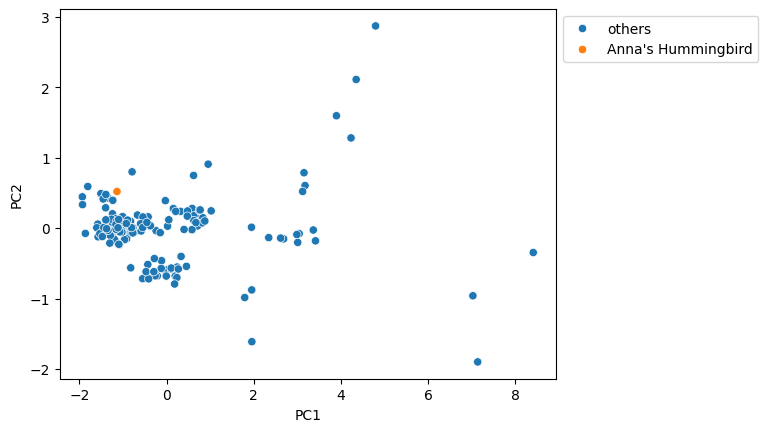

In [96]:
the_name = lambda x:"Anna's Hummingbird" if x=="Anna's Hummingbird" else "others"
sns.scatterplot(
    x = res[:,0] + np.random.normal(0, np.std(res[:,0])/5, size=data.shape[0]),
    y = res[:,1] + np.random.normal(0, np.std(res[:,1])/5, size=data.shape[0]),
    hue = [the_name(i) for i in data['common_name'].values]
)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('PC1')
plt.ylabel('PC2')


# RandomForest

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from scipy.stats import pearsonr

In [98]:
OneHotEncoder().fit_transform(data[['ORDER1_eBird']]).toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(158, 13))

(array([1., 1., 0., 1., 0., 1., 1., 0., 1., 1.]),
 array([0.1 , 0.16, 0.22, 0.28, 0.34, 0.4 , 0.46, 0.52, 0.58, 0.64, 0.7 ]),
 <BarContainer object of 10 artists>)

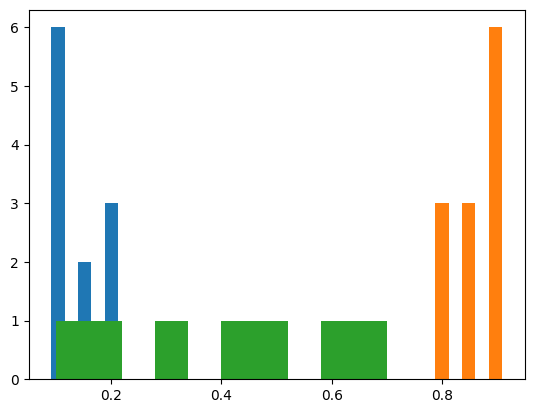

In [99]:
plt.hist(data['ent'].unique())
plt.hist(data['dist'].unique())
plt.hist(data['pow'].unique())

In [100]:
data

,Unnamed: 0,common_name,sp,method,model,mean_ll_improvement,weighted_mean_ll_improvement,mean_win_distance_fraction,weighted_mean_win_distance,mean_energy_improvement,weighted_energy_improvement,pit_d,end_traverse_cor,end_traverse_cor_log,synth_routes_prebreeding_migration_straightness,synth_routes_prebreeding_migration_n_stopovers,synth_routes_prebreeding_migration_speed,synth_routes_breeding_straightness,synth_routes_breeding_n_stopovers,synth_routes_breeding_speed,synth_routes_postbreeding_migration_straightness,synth_routes_postbreeding_migration_n_stopovers,synth_routes_postbreeding_migration_speed,synth_routes_nonbreeding_straightness,synth_routes_nonbreeding_n_stopovers,synth_routes_nonbreeding_speed,training_n_intervals,base_method,method_variation,nonbreeding_lon_c,nonbreeding_lat_c,nonbreeding_lat_max,nonbreeding_lat_min,nonbreeding_lon_max,nonbreeding_lon_min,nonbreeding_range_size,nonbreeding_abundance_variation,prebreeding_lon_c,prebreeding_lat_c,prebreeding_lat_max,prebreeding_lat_min,prebreeding_lon_max,prebreeding_lon_min,prebreeding_range_size,prebreeding_abundance_variation,breeding_lon_c,breeding_lat_c,breeding_lat_max,breeding_lat_min,breeding_lon_max,breeding_lon_min,breeding_range_size,breeding_abundance_variation,postbreeding_lon_c,postbreeding_lat_c,postbreeding_lat_max,postbreeding_lat_min,postbreeding_lon_max,postbreeding_lon_min,postbreeding_range_size,postbreeding_abundance_variation,ent,dist,pow,Species2_eBird,ORDER1_eBird,FAMILY1_eBird,Species1_BirdLife,Species3_BirdTree,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand.Wing_Index,Tail_Length,Mass,Migration,Min_Latitude,Max_Latitude,Centroid_Latitude,Centroid_Longitude,Range_Size,Trophic_Level_Carnivore,Trophic_Level_Herbivore,Trophic_Level_Omnivore,Trophic_Level_Scavenger,Trophic_Niche_Aquatic.predator,Trophic_Niche_Frugivore,Trophic_Niche_Granivore,Trophic_Niche_Herbivore.aquatic,Trophic_Niche_Herbivore.terrestrial,Trophic_Niche_Invertivore,Trophic_Niche_Nectarivore,Trophic_Niche_Omnivore,Trophic_Niche_Scavenger,Trophic_Niche_Vertivore,Primary_Lifestyle_Aerial,Primary_Lifestyle_Aquatic,Primary_Lifestyle_Generalist,Primary_Lifestyle_Insessorial,Primary_Lifestyle_Terrestrial,Realm_Indomalayan,Realm_Palearctic,Realm_Nearctic,Realm_Afrotropical,Realm_Oceanian,Realm_Neotropical,Realm_Australasian,Realm_Antarctic,redlistCategory,populationTrend,habitat_breadth,Diet_Inv,Diet_Vend,Diet_Vect,Diet_Vfish,Diet_Vunk,Diet_Scav,Diet_Fruit,Diet_Nect,Diet_Seed,Diet_PlantO,Diet_5CatFruiNect,Diet_5CatInvertebrate,Diet_5CatOmnivore,Diet_5CatPlantSeed,Diet_5CatVertFishScav,ForStrat_watbelowsurf,ForStrat_wataroundsurf,ForStrat_ground,ForStrat_understory,ForStrat_midhigh,ForStrat_canopy,ForStrat_aerial,Diet_Breadth,ForStrat_Breadth,GenerationLength,TotalInnovations,TotalInnovations.1,TotalFoodTypeInnovations,TotalTechnicalInnovations,InnovationYesOrNo,FoodTypeInnovationYesOrNo,TechnicalInnovationYesOrNo,BrainSize,RelativeBrainSize,PC1,PC2
0,1,Acadian Flycatcher,acafly,ST_and_LL_log,acafly_2022_150km_obs1.0_ent0.002849_dist0.022...,2.541918,2.355796,0.298053,199.196411,180.077524,138.881413,0.570949,0.996531,0.920913,0.925284,0.76,80145.579471,0.888575,0.05,2760.321093,0.938014,0.91,47495.957727,0.901858,0.06,2782.418202,41,ST_and_LL_log,species-specific,-76.221157,5.931460,16.999616,-4.879920,-68.693820,-89.415186,107,0.016902,-80.783434,17.331368,45.476074,-3.524900,-68.693820,-100.810552,305,0.006307,-80.783434,17.331368,45.476074,-3.524900,-68.778270,-100.810552,305,0.006307,-82.504171,21.516829,45.476074,-3.524900,-68.693820,-100.810552,305,0.004945,0.111111,0.888889,0.1,Empidonax virescens,Passeriformes,Tyrannidae (Tyrant Flycatchers),Empidonax virescens,Empidonax virescens,13.3,9.1,6.1,4.0,17.1,71.0,19.9,52.1,27.5,58.8,12.6,3.0,26.59,45.34,36.73,-87.99,3006134.68,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.871565,80.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0

Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best CV R² score     : -0.05389774301468801
Param:  ent 
 0.19339460127377017 
 PearsonRResult(statistic=np.float64(0.49755855783657227), pvalue=np.float64(0.0003205768117125755)) 
 SignificanceResult(statistic=np.float64(0.47758132607529585), pvalue=np.float64(0.000597896501876473))
[('nonbreeding_lat_c', np.float64(0.23563791022914463)), ('postbreeding_lat_max', np.float64(0.061162067290823054)), ('breeding_lon_max', np.float64(0.036421117726831403)), ('nonbreeding_range_size', np.float64(0.03617203655272376)), ('nonbreeding_lon_c', np.float64(0.03589918205610896)), ('Hand.Wing_Index', np.float64(0.03515450406686602)), ('Kipps_Distance', np.float64(0.029321675233463657)), ('postbreeding_abundance_variation', np.float64(0.02922240682495997)), ('Tail_Length', np.float64(0.028199870689666243)), ('Beak_Length_Culmen', np.float64(0.02755100014309547)), ('postbreeding_lon_min', np.float64(0.0245139075141

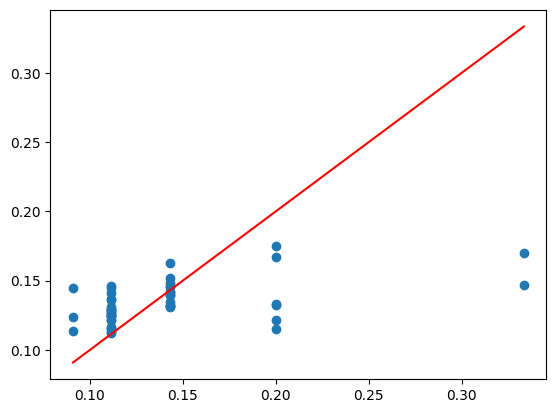


Best hyperparameters: {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best CV R² score     : 0.018898178924157703
Param:  dist 
 0.022422263591177494 
 PearsonRResult(statistic=np.float64(0.37500456074432387), pvalue=np.float64(0.008633693277003442)) 
 SignificanceResult(statistic=np.float64(0.5148867141025426), pvalue=np.float64(0.0001808516659917418))
[('Beak_Width', np.float64(0.17063182376147792)), ('Mass', np.float64(0.13958249739783427)), ('nonbreeding_abundance_variation', np.float64(0.11182542645973387)), ('nonbreeding_lat_c', np.float64(0.09597869008211872)), ('postbreeding_lat_max', np.float64(0.07245534385308292)), ('Kipps_Distance', np.float64(0.05438165952456455)), ('Wing_Length', np.float64(0.053531576827011734)), ('breeding_lat_max', np.float64(0.05049855930066692)), ('Hand.Wing_Index', np.float64(0.033956925275887416)), ('prebreeding_lon_c', np.float64(0.027779818633258888)), ('breeding_lon_c', np.float64(0.020859816643986066)), ('postbreeding_range_size',

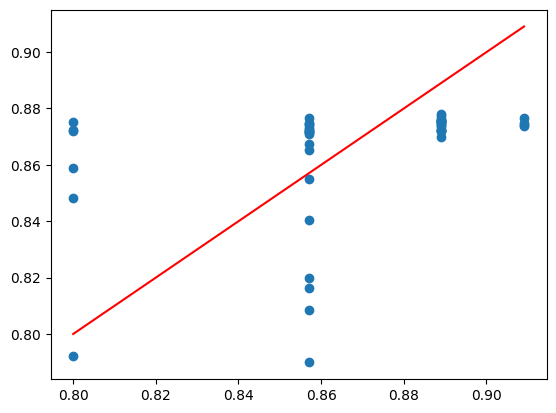


Best hyperparameters: {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best CV R² score     : -1.384134583081231e+30
Param:  pow 
 -0.018483978191520256 
 PearsonRResult(statistic=np.float64(0.08450620578996011), pvalue=np.float64(0.567954723930161)) 
 SignificanceResult(statistic=np.float64(0.1913725279518865), pvalue=np.float64(0.19257498000671505))
[('nonbreeding_lat_c', np.float64(0.21120576048288936)), ('Beak_Length_Culmen', np.float64(0.11336803160036428)), ('nonbreeding_abundance_variation', np.float64(0.08804906824162044)), ('breeding_lon_max', np.float64(0.08748585944118277)), ('postbreeding_lat_max', np.float64(0.0799332133538492)), ('nonbreeding_lon_c', np.float64(0.036729258627561656)), ('Kipps_Distance', np.float64(0.030748802679719224)), ('Beak_Length_Nares', np.float64(0.03009339870351284)), ('prebreeding_lon_max', np.float64(0.029100157049203837)), ('Beak_Depth', np.float64(0.0277343689098682)), ('nonbreeding_lon_max', np.float64(0.026346322857307362)), ('b

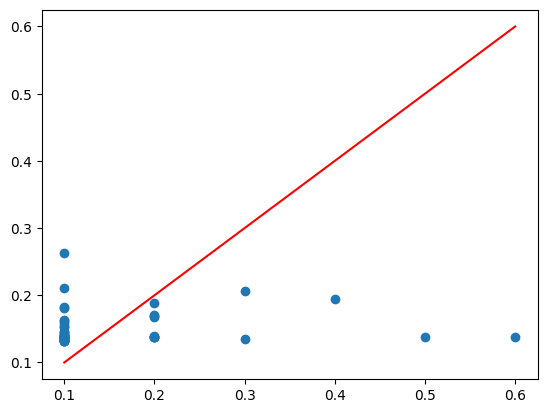

In [102]:
var_ = ['Beak_Length_Culmen', 'Beak_Length_Nares', 'Beak_Width', 'Beak_Depth', 'Tarsus_Length', 'Wing_Length', 
'Kipps_Distance', 'Secondary1', 'Hand.Wing_Index', 'Tail_Length', 'Mass', 
 'nonbreeding_lon_c',
 'nonbreeding_lat_c',
 'nonbreeding_lat_max',
 'nonbreeding_lat_min',
 'nonbreeding_lon_max',
 'nonbreeding_lon_min',
 'nonbreeding_range_size',
 'nonbreeding_abundance_variation',
 'prebreeding_lon_c',
 'prebreeding_lat_c',
 'prebreeding_lat_max',
 'prebreeding_lat_min',
 'prebreeding_lon_max',
 'prebreeding_lon_min',
 'prebreeding_range_size',
 'prebreeding_abundance_variation',
 'breeding_lon_c',
 'breeding_lat_c',
 'breeding_lat_max',
 'breeding_lat_min',
 'breeding_lon_max',
 'breeding_lon_min',
 'breeding_range_size',
 'breeding_abundance_variation',
 'postbreeding_lon_c',
 'postbreeding_lat_c',
 'postbreeding_lat_max',
 'postbreeding_lat_min',
 'postbreeding_lon_max',
 'postbreeding_lon_min',
 'postbreeding_range_size',
 'postbreeding_abundance_variation']
X = data[var_].fillna(-999)

def pearson_corr(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]
pearson_scorer = make_scorer(pearson_corr, greater_is_better=True)

###
for y_name in ['ent','dist','pow']:
    y = data[y_name].fillna(-999)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    model = RandomForestRegressor(n_estimators=100, oob_score=True)
    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth':    [None, 2, 5, 10, 20],
        'min_samples_split': [2, 5, 10, 20]
    }
    grid = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid=param_grid,
        cv=5,                   # 5‑fold CV
        scoring='r2',           # use R² as the metric
        n_jobs=1,              # use all cores
        return_train_score=True # optionally get train‐fold scores
    )
    grid.fit(X_train, y_train)
    print("Best hyperparameters:", grid.best_params_)
    print("Best CV R² score     :", grid.best_score_)
    best_model = grid.best_estimator_

    pred = best_model.predict(X_test)
    print(
        'Param: ', y_name,
        '\n',
        r2_score(y_test.values, pred),
        '\n',
        pearsonr(y_test.values, pred),
        '\n',
        spearmanr(y_test.values, pred),
    )

    print(sorted(dict(zip(var_, best_model.feature_importances_)).items(), key=lambda x:-x[1]))

    ## plot y_true vsd y_pred
    plt.scatter(
        y_test.values, pred
    )
    plt.plot([np.min(y_test.values), np.max(y_test.values)],
            [np.min(y_test.values), np.max(y_test.values)], color='red')
    plt.show()

    print()

